In [1]:
import boto3
import pandas as pd
import io
import re
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy import stats
# import plotly.express as px
import pickle
import random
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from os.path import join
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import os.path
import pandas as pd
import io
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import pickle
import random
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from os.path import join
import warnings
from scipy import stats
import yaml
from sklearn.impute import SimpleImputer
import boto3
import csv
from PIL import Image
from io import BytesIO
import cv2

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
import matplotlib.pyplot as plt


In [6]:
resnet18 = models.resnet18(pretrained=True)


In [8]:
from pympler import asizeof

print(f"{asizeof.asizeof(resnet18)/1024:.2f}MB")

364.28MB


In [11]:
resnet50 = models.resnet50(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\itays/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:09<00:00, 10.8MB/s]


In [12]:
from pympler import asizeof

print(f"{asizeof.asizeof(resnet50)/1024:.2f}MB")

822.91MB


In [13]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights

# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
weights.meta["categories"]

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [6]:
# data_dir = 'path_to_your_data'
data_dir = fr'C:\Users\itays\Desktop\accumulated_files\images'

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.ImageFolder(join(data_dir, 'train'), transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = datasets.ImageFolder(join(data_dir, 'val'), transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32)


In [10]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
train_loss, val_loss = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss / len(train_loader))

    model.eval()
    running_loss = 0.0
    for inputs, labels in val_loader:
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    val_loss.append(running_loss / len(val_loader))

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}')


Epoch 1/10, Train Loss: 9.1063, Val Loss: 9.1834
Epoch 2/10, Train Loss: 7.5469, Val Loss: 8.5762
Epoch 3/10, Train Loss: 5.3258, Val Loss: 7.8923
Epoch 4/10, Train Loss: 3.2424, Val Loss: 7.4489
Epoch 5/10, Train Loss: 1.5996, Val Loss: 7.4681
Epoch 6/10, Train Loss: 0.5972, Val Loss: 7.9320
Epoch 7/10, Train Loss: 0.1654, Val Loss: 8.9710
Epoch 8/10, Train Loss: 0.0614, Val Loss: 10.1130
Epoch 9/10, Train Loss: 0.0279, Val Loss: 11.1001
Epoch 10/10, Train Loss: 0.0140, Val Loss: 11.9026


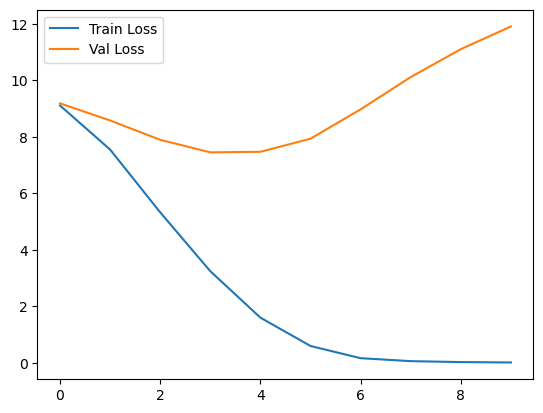

In [11]:
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.show()


In [15]:
torch.max(model(inputs), 1)

torch.return_types.max(
values=tensor([15.5523, 18.6274, 15.0937, 14.2048, 24.2855], grad_fn=<MaxBackward0>),
indices=tensor([0, 1, 1, 1, 0]))

In [17]:
weights.meta["categories"][1]

'goldfish'

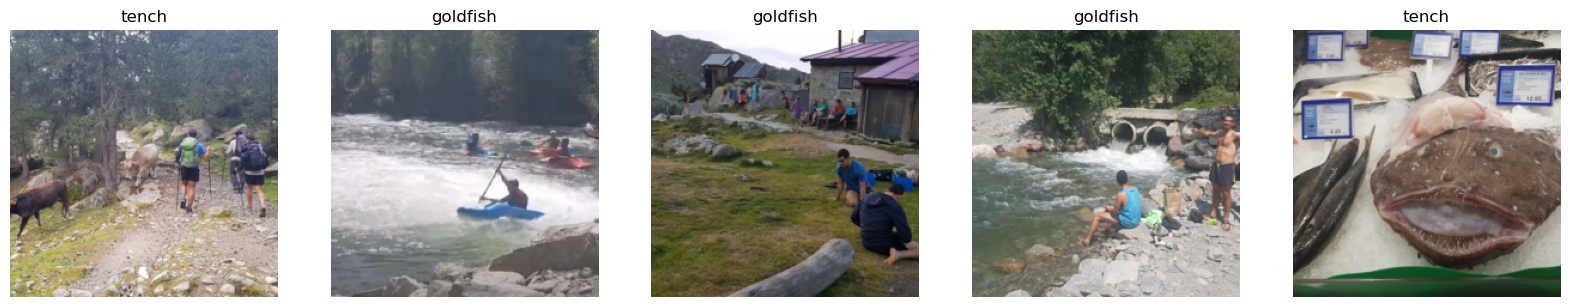

In [13]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def draw_predictions(inputs, preds):
    # Assuming class_to_idx is a dictionary mapping class indices to class labels
    idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}
    
    # Convert the tensor to the CPU and convert to PIL Images
    inputs = inputs.cpu()
    images = []
    for input_image in inputs:
        images.append(input_image)
    
    fig, axs = plt.subplots(1, len(images), figsize=(20, 5))
    for i, ax in enumerate(axs):
        inversed_image = prepare_tensor_for_drawing(images[i])
        ax.imshow(inversed_image)
#         ax.set_title(idx_to_class[preds[i].item()])
        ax.set_title(weights.meta["categories"][preds[i].item()])
        ax.axis('off')
    
    plt.show()

# Usage:
# Assuming test_loader is a DataLoader for your test data
for inputs, _ in train_loader:
    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        draw_predictions(inputs, preds)


In [8]:
train_dataset[0][0]

tensor([[[-1.3473, -1.3302, -1.2788,  ...,  0.6392,  0.6563,  0.6392],
         [-1.3644, -1.3302, -1.2788,  ...,  0.6563,  0.6221,  0.6392],
         [-1.3130, -1.2959, -1.1075,  ...,  0.6392,  0.5022,  0.5878],
         ...,
         [-1.5699, -1.5870, -1.5870,  ..., -1.6898, -1.6898, -1.6898],
         [-1.6213, -1.6213, -1.6213,  ..., -1.6898, -1.6898, -1.6727],
         [-1.6555, -1.6555, -1.6555,  ..., -1.6898, -1.6898, -1.7069]],

        [[-1.2829, -1.2654, -1.2129,  ...,  0.6429,  0.6254,  0.6254],
         [-1.3004, -1.2654, -1.2129,  ...,  0.6604,  0.6078,  0.6254],
         [-1.2479, -1.2304, -1.0378,  ...,  0.6078,  0.4853,  0.5728],
         ...,
         [-1.0378, -1.0553, -1.0553,  ..., -1.3004, -1.2829, -1.3004],
         [-1.1078, -1.1253, -1.1253,  ..., -1.3529, -1.3354, -1.3354],
         [-1.1604, -1.1604, -1.1604,  ..., -1.4230, -1.4230, -1.4230]],

        [[-1.0376, -1.0201, -0.9678,  ...,  0.6182,  0.6182,  0.6008],
         [-1.0550, -1.0201, -0.9678,  ...,  0

In [9]:
# plt.imshow(train_dataset[0][0].reshape(-1))

In [10]:
image = train_dataset[0][0]
image.reshape([image.shape[1], image.shape[2], image.shape[0]]).shape

torch.Size([224, 224, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


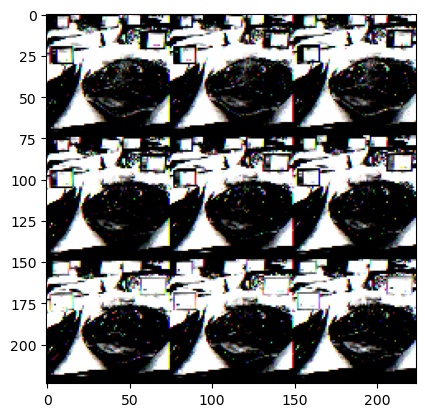

In [11]:
plt.imshow(image.reshape([image.shape[1], image.shape[2], image.shape[0]]))

In [17]:
# image

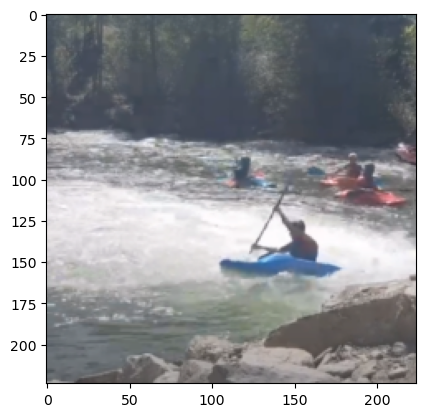

In [16]:
transformed_image_tensor = train_dataset[1][0]#dataset[index]

# Define the inverse normalization transformation
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
inverse_normalize = transforms.Normalize(
    mean=[-mean[0] / std[0], -mean[1] / std[1], -mean[2] / std[2]],
    std=[1 / std[0], 1 / std[1], 1 / std[2]]
)

# Apply the inverse transformations
inverse_normalized_tensor = inverse_normalize(transformed_image_tensor)
inverse_tensor_to_numpy = transforms.ToPILImage()(inverse_normalized_tensor)  # Convert to a PIL image
image_numpy = np.array(inverse_tensor_to_numpy)  # Convert to a NumPy array

# Display the image using OpenCV
# cv2.imshow('Original Image', image_numpy)
plt.imshow(image_numpy);

In [24]:
image_numpy.shape

(224, 224, 3)

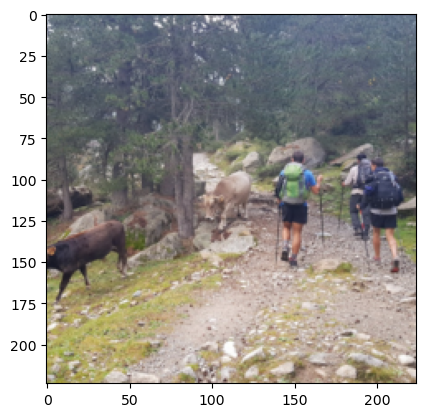

In [8]:
transformed_image_tensor = train_dataset[1][0]#dataset[index]


def prepare_tensor_for_drawing(transformed_image_tensor):
    # Define the inverse normalization transformation
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    inverse_normalize = transforms.Normalize(
        mean=[-mean[0] / std[0], -mean[1] / std[1], -mean[2] / std[2]],
        std=[1 / std[0], 1 / std[1], 1 / std[2]]
    )

    # Assuming 'transformed_image_tensor' is your transformed image tensor
    # Apply the inverse transformations
    inverse_normalized_tensor = inverse_normalize(transformed_image_tensor)
    inverse_normalized_numpy = inverse_normalized_tensor.cpu().numpy()  # Convert to NumPy array

    # Rescale values back to the original range [0, 255]
    inverse_normalized_numpy = (inverse_normalized_numpy * 255).astype(np.uint8)

    # Convert the tensor to the original image format
    # This depends on the original format of the images (e.g., RGB, BGR)
    original_image = inverse_normalized_numpy.transpose(1, 2, 0)  # Change dimensions if necessary

    return original_image
    
    # Display the original image using OpenCV
plt.imshow(prepare_tensor_for_drawing(transformed_image_tensor));